In [ ]:
!apt update && apt install cuda-11-8
!pip install deeplabcut[tf,modelzoo]

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
54 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as 

In [ ]:
# prompt: connect to drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import deeplabcut
import os

Loading DLC 2.3.10...
DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


In [ ]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip

# Define the start and end times (in seconds)
start_time = 60  # Start at 30 seconds
end_time = 80    # End at 60 seconds

# Path to original video and the new trimmed video
video_path = '/content/drive/MyDrive/00000000209000100.mp4'
trimmed_video_path = '/content/drive/MyDrive/trimmed_video2.mp4'


In [ ]:
deeplabcut.create_pretrained_project(
    "cattle_pose",                    # Name of your project
    "abson",                       # Your name
    ['/content/drive/MyDrive/trimmed_video2.mp4'],         # Path to your video
    model="superanimal_quadruped",  # Pre-trained model (choose based on your needs)
    working_directory="/content/drive/MyDrive/cattle_pos2/",  # Directory where the project will be saved
    createlabeledvideo=False
)

Created "/content/drive/MyDrive/cattle_pos2/cattle_pose-abson-2024-09-22/videos"
Created "/content/drive/MyDrive/cattle_pos2/cattle_pose-abson-2024-09-22/labeled-data"
Created "/content/drive/MyDrive/cattle_pos2/cattle_pose-abson-2024-09-22/training-datasets"
Created "/content/drive/MyDrive/cattle_pos2/cattle_pose-abson-2024-09-22/dlc-models"
Attempting to create a symbolic link of the video ...
Symlink creation impossible (exFat architecture?): copying the video instead.
/content/drive/MyDrive/trimmed_video2.mp4 copied to /content/drive/MyDrive/cattle_pos2/cattle_pose-abson-2024-09-22/videos/trimmed_video2.mp4
/content/drive/MyDrive/cattle_pos2/cattle_pose-abson-2024-09-22/videos/trimmed_video2.mp4
Generated "/content/drive/MyDrive/cattle_pos2/cattle_pose-abson-2024-09-22/config.yaml"

A new project with name cattle_pose-abson-2024-09-22 is created at /content/drive/MyDrive/cattle_pos2 and a configurable file (config.yaml) is stored there. Change the parameters in this file to adapt t

(…)d_resnet_50_iteration-0_shuffle-1.tar.gz:   0%|          | 0.00/294M [00:00<?, ?B/s]

/content/drive/MyDrive/cattle_pos2/cattle_pose-abson-2024-09-22/dlc-models/iteration-0/cattle_poseSep22-trainset95shuffle1/train/pose_cfg.yaml
Analyzing video...
Using snapshot-700000 for model /content/drive/MyDrive/cattle_pos2/cattle_pose-abson-2024-09-22/dlc-models/iteration-0/cattle_poseSep22-trainset95shuffle1


/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Analyzing all the videos in the directory...
Starting to analyze %  /content/drive/MyDrive/cattle_pos2/cattle_pose-abson-2024-09-22/videos/trimmed_video2.mp4
Loading  /content/drive/MyDrive/cattle_pos2/cattle_pose-abson-2024-09-22/videos/trimmed_video2.mp4
Duration of video [s]:  19.23 , recorded with  30.1 fps!
Overall # of frames:  579  found with (before cropping) frame dimensions:  1280 720
Starting to extract posture


 99%|█████████▉| 576/579 [00:48<00:00, 11.97it/s]/usr/local/lib/python3.10/dist-packages/deeplabcut/pose_estimation_tensorflow/predict_videos.py:888: UserWarning: Could not decode frame #578.
  warnings.warn(f"Could not decode frame #{counter}.")
100%|█████████▉| 578/579 [00:48<00:00, 11.82it/s]


Saving results in /content/drive/MyDrive/cattle_pos2/cattle_pose-abson-2024-09-22/videos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.


('/content/drive/MyDrive/cattle_pos2/cattle_pose-abson-2024-09-22/config.yaml',
 '/content/drive/MyDrive/cattle_pos2/cattle_pose-abson-2024-09-22/dlc-models/iteration-0/cattle_poseSep22-trainset95shuffle1/train/pose_cfg.yaml')

In [ ]:
deeplabcut.video_inference_superanimal(
    ['/content/drive/MyDrive/trimmed_video2.mp4'],  # Path to your video
    'superanimal_quadruped',      # The pre-trained model to use
    video_adapt=False,            # Whether to adapt the video for the model
    pcutoff=0.55,                 # Confidence cutoff for keypoint detection
)

/usr/local/lib/python3.10/dist-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/superanimal_quadruped_weights exists, using the downloaded weights


/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Loading  /content/drive/MyDrive/trimmed_video4.mp4
Duration of video [s]:  19.24 , recorded with  30.1 fps!
Overall # of frames:  579  found with (before cropping) frame dimensions:  1280 720
Starting to extract posture


  0%|          | 0/579 [00:00<?, ?it/s]

scale list [670, 720, 770]


100%|██████████| 579/579 [02:33<00:00,  3.76it/s]


Saving results in /content/drive/MyDrive...
Starting to process video: /content/drive/MyDrive/trimmed_video4.mp4
Loading /content/drive/MyDrive/trimmed_video4.mp4 and data.
Duration of video [s]: 19.23, recorded with 30.1 fps!
Overall # of frames: 579 with cropped frame dimensions: 1280 720
Generating frames and creating video.


100%|██████████| 578/578 [00:11<00:00, 49.80it/s]


In [ ]:
deeplabcut.analyze_videos('/content/drive/MyDrive/cattle_pose/cattle_pose-abson-2024-09-22/config.yaml', '/content/drive/MyDrive/cattle_pose/cattle_pose-abson-2024-09-22/videos/trimmed_video2DLC_dlcrnetms5_cattle_poseSep22shuffle1_700000_filtered_labeled.mp4')


Using snapshot-700000 for model /content/drive/MyDrive/cattle_pose/cattle_pose-abson-2024-09-22/dlc-models/iteration-0/cattle_poseSep22-trainset95shuffle1


/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


No video(s) were found. Please check your paths and/or 'video_type'.


'DLC_dlcrnetms5_cattle_poseSep22shuffle1_700000'

In [ ]:
deeplabcut.create_labeled_video(
    '/content/drive/MyDrive/cattle_pos2/cattle_pose-abson-2024-09-22/config.yaml',           # Path to the config.yaml file generated during project creation
    ['/content/drive/MyDrive/cattle_pos2/cattle_pose-abson-2024-09-22/videos/trimmed_video2.mp4'],      # Path to the video
    draw_skeleton=True,
    track_method = 'skeleton',
)

Starting to process video: /content/drive/MyDrive/cattle_pos2/cattle_pose-abson-2024-09-22/videos/trimmed_video2.mp4
Labeled video trimmed_video2 already created.


[True]

In [ ]:
deeplabcut.plot_trajectories('/content/drive/MyDrive/cattle_pos2/cattle_pose-abson-2024-09-22/config.yaml',           # Path to the config.yaml file generated during project creation
    ['/content/drive/MyDrive/cattle_pos2/cattle_pose-abson-2024-09-22/videos/trimmed_video2.mp4'], )


Loading  /content/drive/MyDrive/cattle_pos2/cattle_pose-abson-2024-09-22/videos/trimmed_video2.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory


In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('/content/drive/MyDrive/cattle_pos2/cattle_pose-abson-2024-09-22/videos/trimmed_video2DLC_dlcrnetms5_cattle_poseSep22shuffle1_700000_labeled.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)


Buffered data was truncated after reaching the output size limit.

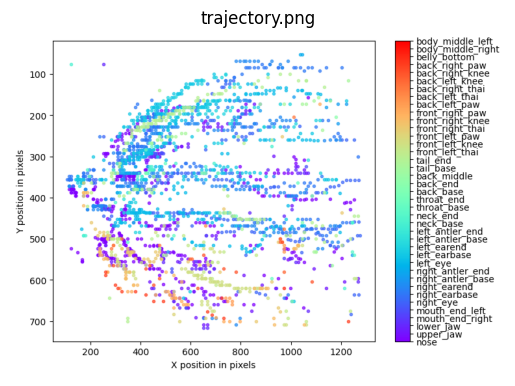

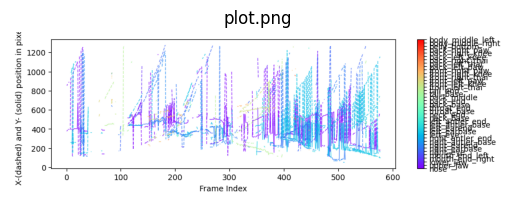

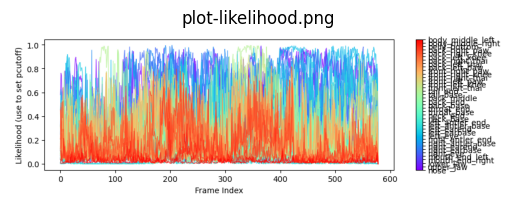

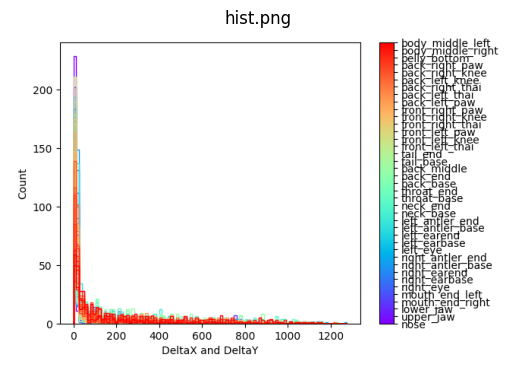

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Replace with the actual path to your directory containing the PNG files
image_directory = '/content/drive/MyDrive/cattle_pos2/cattle_pose-abson-2024-09-22/videos/plot-poses/trimmed_video2'

# Get a list of all PNG files in the directory
png_files = [f for f in os.listdir(image_directory) if f.endswith('.png')]

# Iterate through the PNG files and plot them
for png_file in png_files:
    image_path = os.path.join(image_directory, png_file)
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(png_file)
    plt.axis('off')  # Optional: turn off axis labels
    plt.show()
